<b><center><font face="Times New Roman" size=6.5>Snow Ball Pricing in BSM and Heston Model</font></center></b><br>
<b><center><font face="Times New Roman" size=4> Team1: Wu Hao, Yang Shuming</font></center></b><br>

<b><font face="Times New Roman" size=6>Theoretical Part</font></b><br>

# Intruduction to snowball option
<font face="Times New Roman" size=4.5>Snowball option is a Structured Product and Path Dependent Product</font>

$$
\begin{array}{|c|l|}
\hline \text { Underlying asset } & \text { CSI } 500 \text { Index (000905.SH ) } \\
\hline \text { Observation period } & \begin{array}{l}
360 \text { days; From the third month, monthly observation weather } \\
\text { to knock out and daily observation weather to knock in }
\end{array} \\
\hline \text { Option Structure } & \text { Automatic knock in and knock out structure } \\
\hline \text { Nominal principal } & 1000000 \\
\hline \text { knock out level } & \mathrm{S}_0{ }^* 103 \% \\
\hline \text { knock in level } & \mathrm{S}_0{ }^* 80 \% \\
\hline \text { Coupon rate } & 25 \% \\
\hline \begin{array}{c}
\text { When to knock } \\
\text { out(monthly) }
\end{array} & \begin{array}{l}
\text { If on any knock out observation day, the closing price of } \\
\text { underlying asset is greater than or equal to the knoc kout level }
\end{array} \\
\hline \text { When to knock out(daily) } & \begin{array}{l}
\text { If on any knock out observation day, the closing price of } \\
\text { underlying asset is less than the knoc kout level }
\end{array} \\
\hline \text { Pay-offs } & \begin{array}{l}
\text { 1. Knock out: (1+25% * Interest accrual days/365)* Nominal principal }
 \\
\text { 2. Not knocked in but not knocked out: } \text { Nominal principal * }(1 + 25 \%{ }^* \\
\text { interest accrual days } / 365)
 \\
\text { 3. Knocked in and not knocked out (the closing price of the } \\
\text { target is less than the opening price): (closing price/opening } \\
\text { price }\text { ) } * \text { Principal }
 \\
\text { 4. Knocked in and not knocked out (the closing price of the } \\
\text { object is between the opening price and the knocked out } \\
\text { price): Nominal principal} 
\end{array} \\
\hline
\end{array}
$$

# scenario analysis

## Trigger and knock out, and the product ends in advance

<center><font face="Times New Roman" size=4> Pay-offs=(1+ Coupon rate * Interest accrual days/365)* Nominal Principal</font></center>

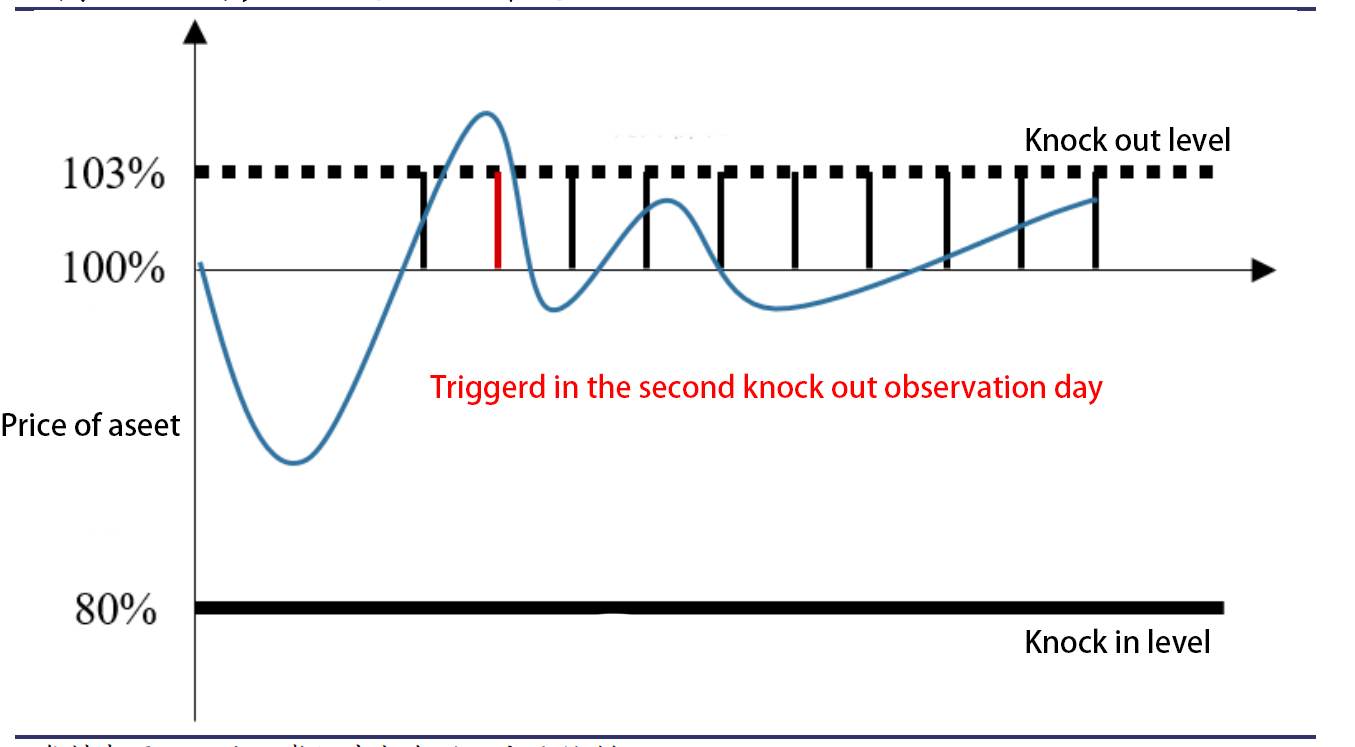

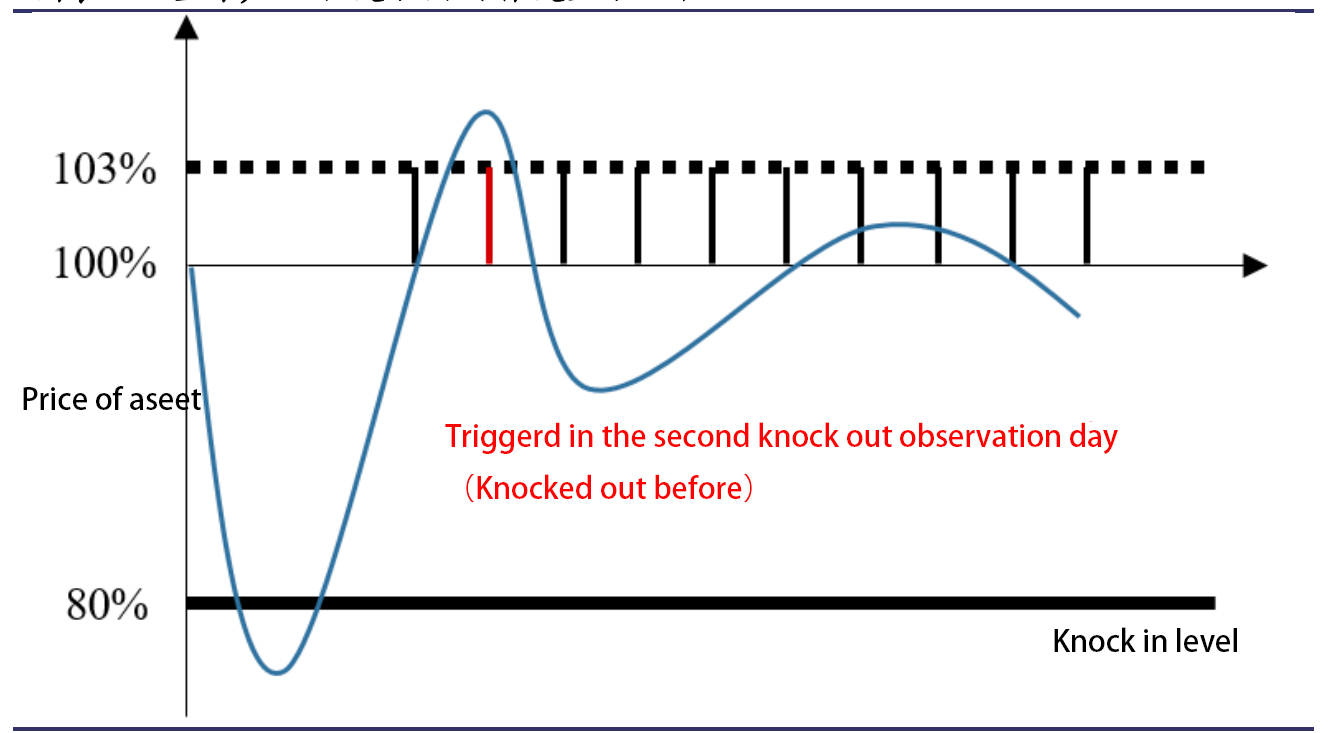

## No knock in and No knock out

<center><font face="Times New Roman" size=4>Payoffs=(1+Coupon rate  * interest accrual days/365)*Nominal Principal </font></center>

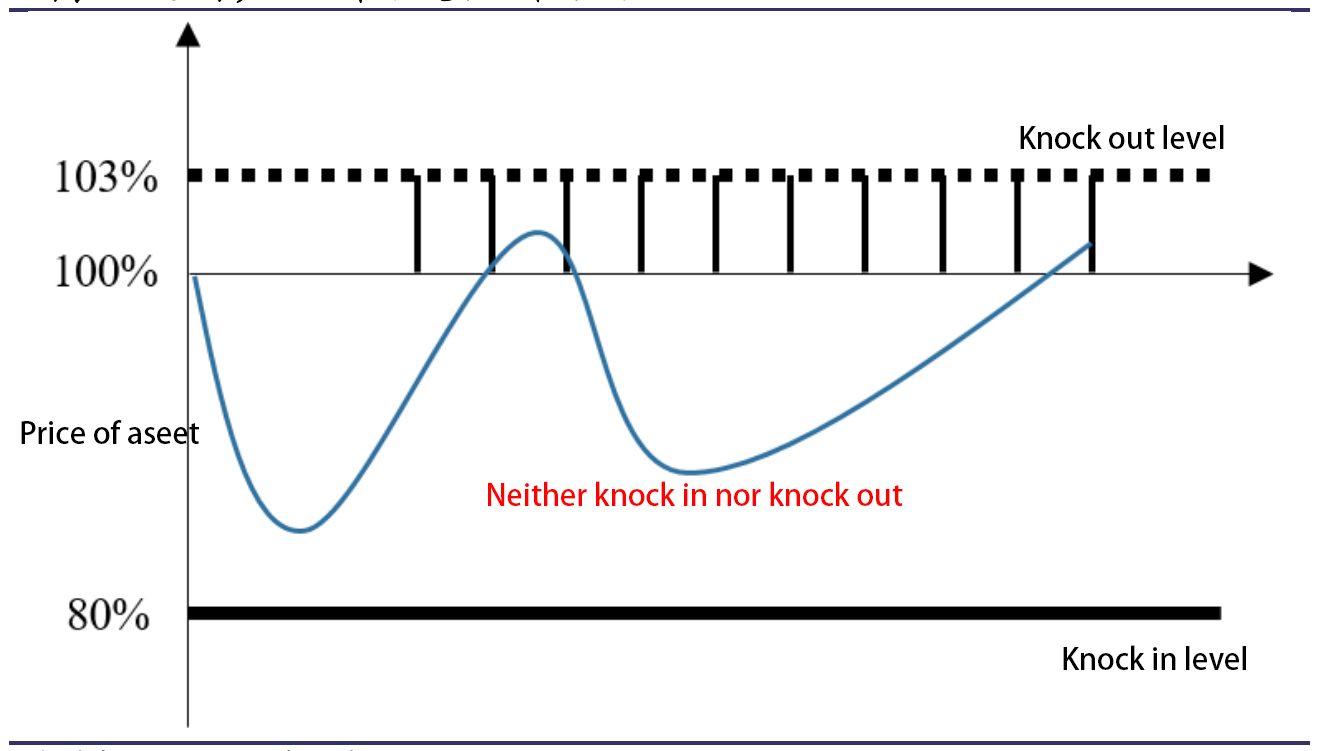

## Knocked in and not knocked out (the closing price of the target is less than the opening price):

<center><font face="Times New Roman" size=4>Payoffs=(Closing price/Initial price)*Principal</font></center>

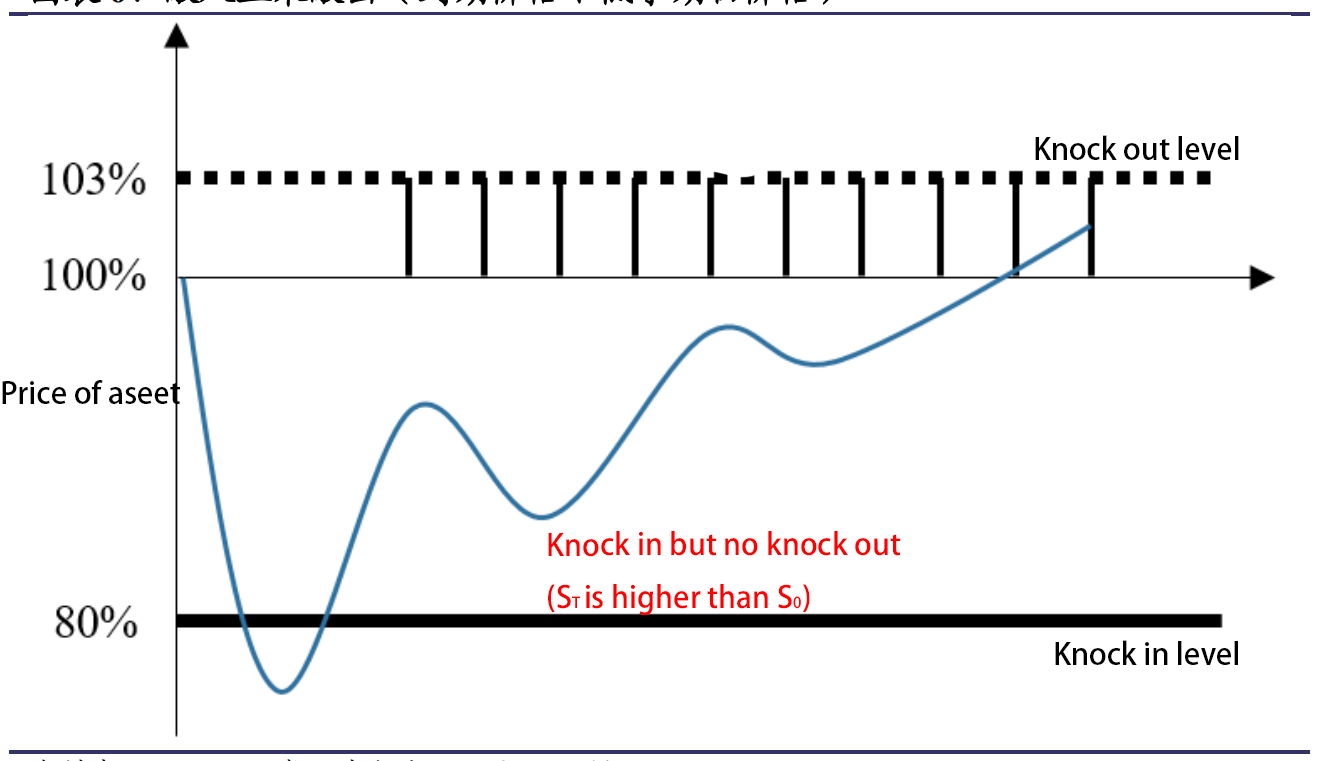

## Knocked in and not knocked out (the closing price of the object is between the opening price and the knocked out price): 

<center><font face="Times New Roman" size=4>Payoffs=Principal</font></center>

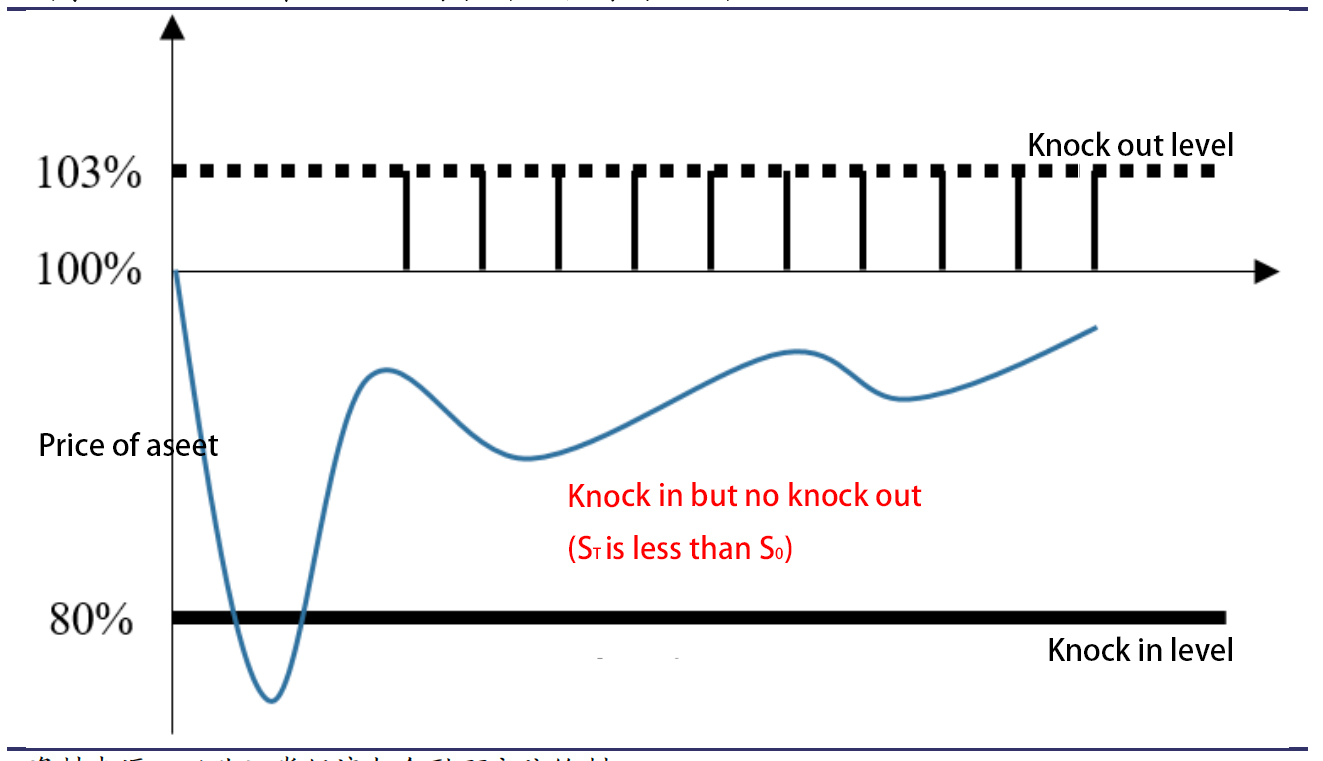

# Market Performance

* <font face="Times New Roman" size=4.5>Launched in Chinese market from 2017, the sales volume have exceed 1 trillion in 2021, making it the most popular OTC derivative product in the Chinese market</font>



* <font face="Times New Roman" size=4.5>The most popular time parameter is 24 months, and the most popular underlying asset is CSI 500</font>


* <font face="Times New Roman" size=4.5>75% knock out in advance/5% no knock out and no knock in/ 25% knock in</font>


<font face="Times New Roman" size=4.5>Why invstors like snowball? </font>


* <font face="Times New Roman" size=4.5>Invest in volatility, rather than totally depend on market conditions</font>


* <font face="Times New Roman" size=4.5>Weakening market timing decision</font>


* <font face="Times New Roman" size=4.5>Gain Amplifier and Loss Reducer</font>


* <font face="Times New Roman" size=4.5>The choice of risk and return between fixed income products and stock products</font>

<b><font face="Times New Roman" size=6>Simulation Part</font></b><br>

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import sys
import os
# print(os.path.abspath(os.path.join(os.getcwd(), "../..")))
sys.path.append(f'{os.path.abspath(os.path.join(os.getcwd(), "../.."))}/Code/PyFENG/pyfeng')
from snowball import *
import pyfeng as pf

In [5]:
class SnowBallOption:
    texp = 2
    nominal_amount = 1000000
    coupon_rate = 0.152
    intr = 0.0273  # China 10y Government Bond annual yield
    bound = [0.75, 1.0]
    model = BSM_model
    n_path = 50000
    n_time = texp * 365
    dt = 1/365

    def __init__(self, texp, nominal_amount, coupon_rate, bound, model, model_type, n_path):
        """
        :param texp: maturity
        :param coupon_rate: risk-free rate
        :param nominal_amount: size of the snow ball option
        :param bound: knock in and out level
        :param model: BSM & Heston
        :param n_path: simulate stock prices process paths
        :param n_time: discrete time number
        :param start_date: start date of the snow ball option
        :param check_knockout_date: check knock out dates
        """


        self.texp = texp
        self.model = model
        self.nominal_amount = nominal_amount
        self.coupon_rate = coupon_rate
        self.knock_out = bound[1]
        self.knock_in = bound[0]
        self.n_path = n_path
        self.n_time = texp * 365
        self.model_type = model_type # BSM & Heston
        # self.start_date = start_date
        # self.check_knockout_date = check_knockout_date

    def set_model_params(self,**kwargs):
        self.kwargs = kwargs
    def MC_res(self, spot_price):

        df_res = pd.DataFrame(index=range(self.n_path),columns=['knock_out','knock_in','expire date','stock price','discounted payoff'])

        S_0 = np.ones(self.n_path) * spot_price # start price

        S_path = np.zeros(shape=(self.n_path,self.n_time)) # record every path's stock price at each time point
        S_path[:,0] = S_0

        if self.model_type == 'BSM':
            for i in range(self.n_time-1):
                S_path[:,i+1] = self.model.stock_price(S_path[:,i], self.dt)

        elif self.model_type == 'Heston':
            m1 = pf.HestonMcAndersen2008(sigma=self.model.sigma,
                                         vov=self.model.vov,
                                         rho=self.model.rho,
                                         mr=self.model.mr,
                                         theta=self.model.theta,
                                         intr=self.model.intr)
            m1.set_num_params(n_path=self.n_path, dt=self.dt, rn_seed=12345)
            sigma_t = np.ones(self.n_path) * Heston_model.sigma
            for i in range(self.n_time-1):
                S_path[:,i+1], sigma_tp1 = self.model.stock_price(m1, S_path[:,i], sigma_t, self.dt)
                sigma_t = sigma_tp1

        self.stock_path = S_path
        # if knock out
        check_knockout_id = [i for i in range(90,self.texp*365,30)]
        # check_knockout_id = [(i-self.start_date).days for i in self.check_knockout_date] # id of check knock out dates
        check_knockout_price = S_path[:,check_knockout_id] # underlying price at observed knockout date
        bool_knockout = (check_knockout_price>self.knock_out*spot_price) # whether it knock out at each observed date
        whether_knockout = np.sum(bool_knockout,axis=1) # whether the path has knocked out

        df_res.loc[whether_knockout==0,'knock_out'] = False # path has not knocked out
        df_res.loc[whether_knockout!=0,'knock_out'] = True # path has knocked out

        for i in df_res.loc[:,'knock_out'][whether_knockout!=0].index:
            first_knockout_date = check_knockout_id[np.where(bool_knockout[i,:]==True)[0][0]] # the first date of knock out
            df_res.loc[i,'expire date'] = first_knockout_date # expire date of the path
            df_res.loc[i,'stock price'] = S_path[i,first_knockout_date]
        net_return = df_res.loc[whether_knockout!=0,'expire date']/365 * self.coupon_rate
        df_res.loc[whether_knockout != 0, 'discounted payoff'] = (net_return+1) * self.nominal_amount * np.exp((-self.intr * df_res.loc[whether_knockout!=0,'expire date']/365).astype(float))

        # if not knock out and not knock in
        bool_knockin = (S_path<self.knock_in*spot_price) # whether the path knock in each day
        whether_knockin = np.sum(bool_knockin,axis=1) # whether the path has knocked in
        df_res.loc[whether_knockin==0,'knock_in'] = False
        df_res.loc[whether_knockin!=0,'knock_in'] = True
        df_res.loc[(df_res.knock_in==False) & (df_res.knock_out==False),'expire date'] = check_knockout_id[-1] # not knock in and knock out
        df_res.loc[(df_res.knock_in==False) & (df_res.knock_out==False),'stock price'] = S_path[(whether_knockin==0) & (whether_knockout==0),-1]
        df_res.loc[(df_res.knock_in == False) & (df_res.knock_out == False), 'discounted payoff'] = (check_knockout_id[-1]/365 * self.coupon_rate+1) * self.nominal_amount * np.exp(-self.intr * check_knockout_id[-1]/365)

        # if knock in and final price is between spot price and knock level

        df_res.loc[(df_res.knock_in == True) & (df_res.knock_out == False) & (S_path[:,-1] > spot_price),'expire date'] = check_knockout_id[-1]
        df_res.loc[(df_res.knock_in == True) & (df_res.knock_out == False) & (S_path[:, -1] > spot_price), 'stock price'] = S_path[(df_res.knock_in == True) & (df_res.knock_out == False) & (S_path[:, -1]>spot_price), -1]
        df_res.loc[(df_res.knock_in == True) & (df_res.knock_out == False) & (S_path[:, -1] > spot_price), 'discounted payoff'] = self.nominal_amount * (np.exp(-self.intr * check_knockout_id[-1] / 365))

        # if knock in and final price is smaller than spot price
        df_res.loc[(df_res.knock_in == True) & (df_res.knock_out == False) & (S_path[:, -1] < spot_price), 'expire date'] = check_knockout_id[-1]
        df_res.loc[(df_res.knock_in == True) & (df_res.knock_out == False) & (S_path[:, -1] < spot_price), 'stock price'] = S_path[(df_res.knock_in == True) & (df_res.knock_out == False) & (S_path[:, -1] < spot_price), -1]
        end_price = S_path[(df_res.knock_in == True) & (df_res.knock_out == False) & (S_path[:, -1] < spot_price), -1]
        df_res.loc[(df_res.knock_in == True) & (df_res.knock_out == False) & (S_path[:, -1] < spot_price), 'discounted payoff'] = \
            (end_price/spot_price) * self.nominal_amount * np.exp(-self.intr * check_knockout_id[-1] / 365)

        return df_res

    def price(self,spot_price):
        mc_res = self.MC_res(spot_price)
        price = mc_res['discounted payoff'].mean()
        return price

# Snow Ball Pricing Based on BSM

<font face="Times New Roman" size=4.5>The underlying asset is geometric browian motion</font><br>

<b><center><font face="Times New Roman" size=4.5>$\frac{d S_t}{S_t}=\mu \cdot d t+\sigma \cdot d W$</font></center></b>

In [ ]:
class BSM_model:

    miu = 0.0273
    sigma = 0.3347

    def __init__(self,miu,sigma):
        self.miu = miu
        self.sigma = sigma

    def stock_price(self,S_t:np.array,dt):
        """
        in BSM model, we assume stock price is geometry Brownian motion
        dS_t/S_t = miu dt + sigma dB_t
        S_t+1 = S_t * exp((miu-0.5*sigma^2)dt + sigma * dB_t)

        :param S_t: stock price in t
        :param dt: discrete time interval
        :return: S_t+1
        """
        Z_t = st.norm.rvs(loc=0,scale=1,size=(len(S_t))) # normal random number array
        S_tp1 = S_t*np.exp((self.miu-0.5*self.sigma**2)*dt+self.sigma*np.sqrt(dt)*Z_t) # S_t+1

        return S_tp1

<b><font face="Times New Roman" size=5>Pricing Three different Products</font></b><br>

## Product 1

In [39]:
np.random.seed(0)
texp = 2
coupon_rate = 0.152
nominal_amount = 1000000
bound = [0.75, 1.0]
model = BSM_model(miu = 0.0273, sigma = 0.2225)# sigma is the ATM IV 
model_type = 'BSM'
n_path = 30000
n_time = texp * 365
dt = 1/365
snowball = SnowBallOption(texp, nominal_amount, coupon_rate, bound, model, n_path)
snowball.set_model_params(miu = 0.0273, sigma = 0.2225) 
print('Snow Ball price is %.2f' %(snowball.price(spot_price=7118)))

Snow Ball price is 997968.58


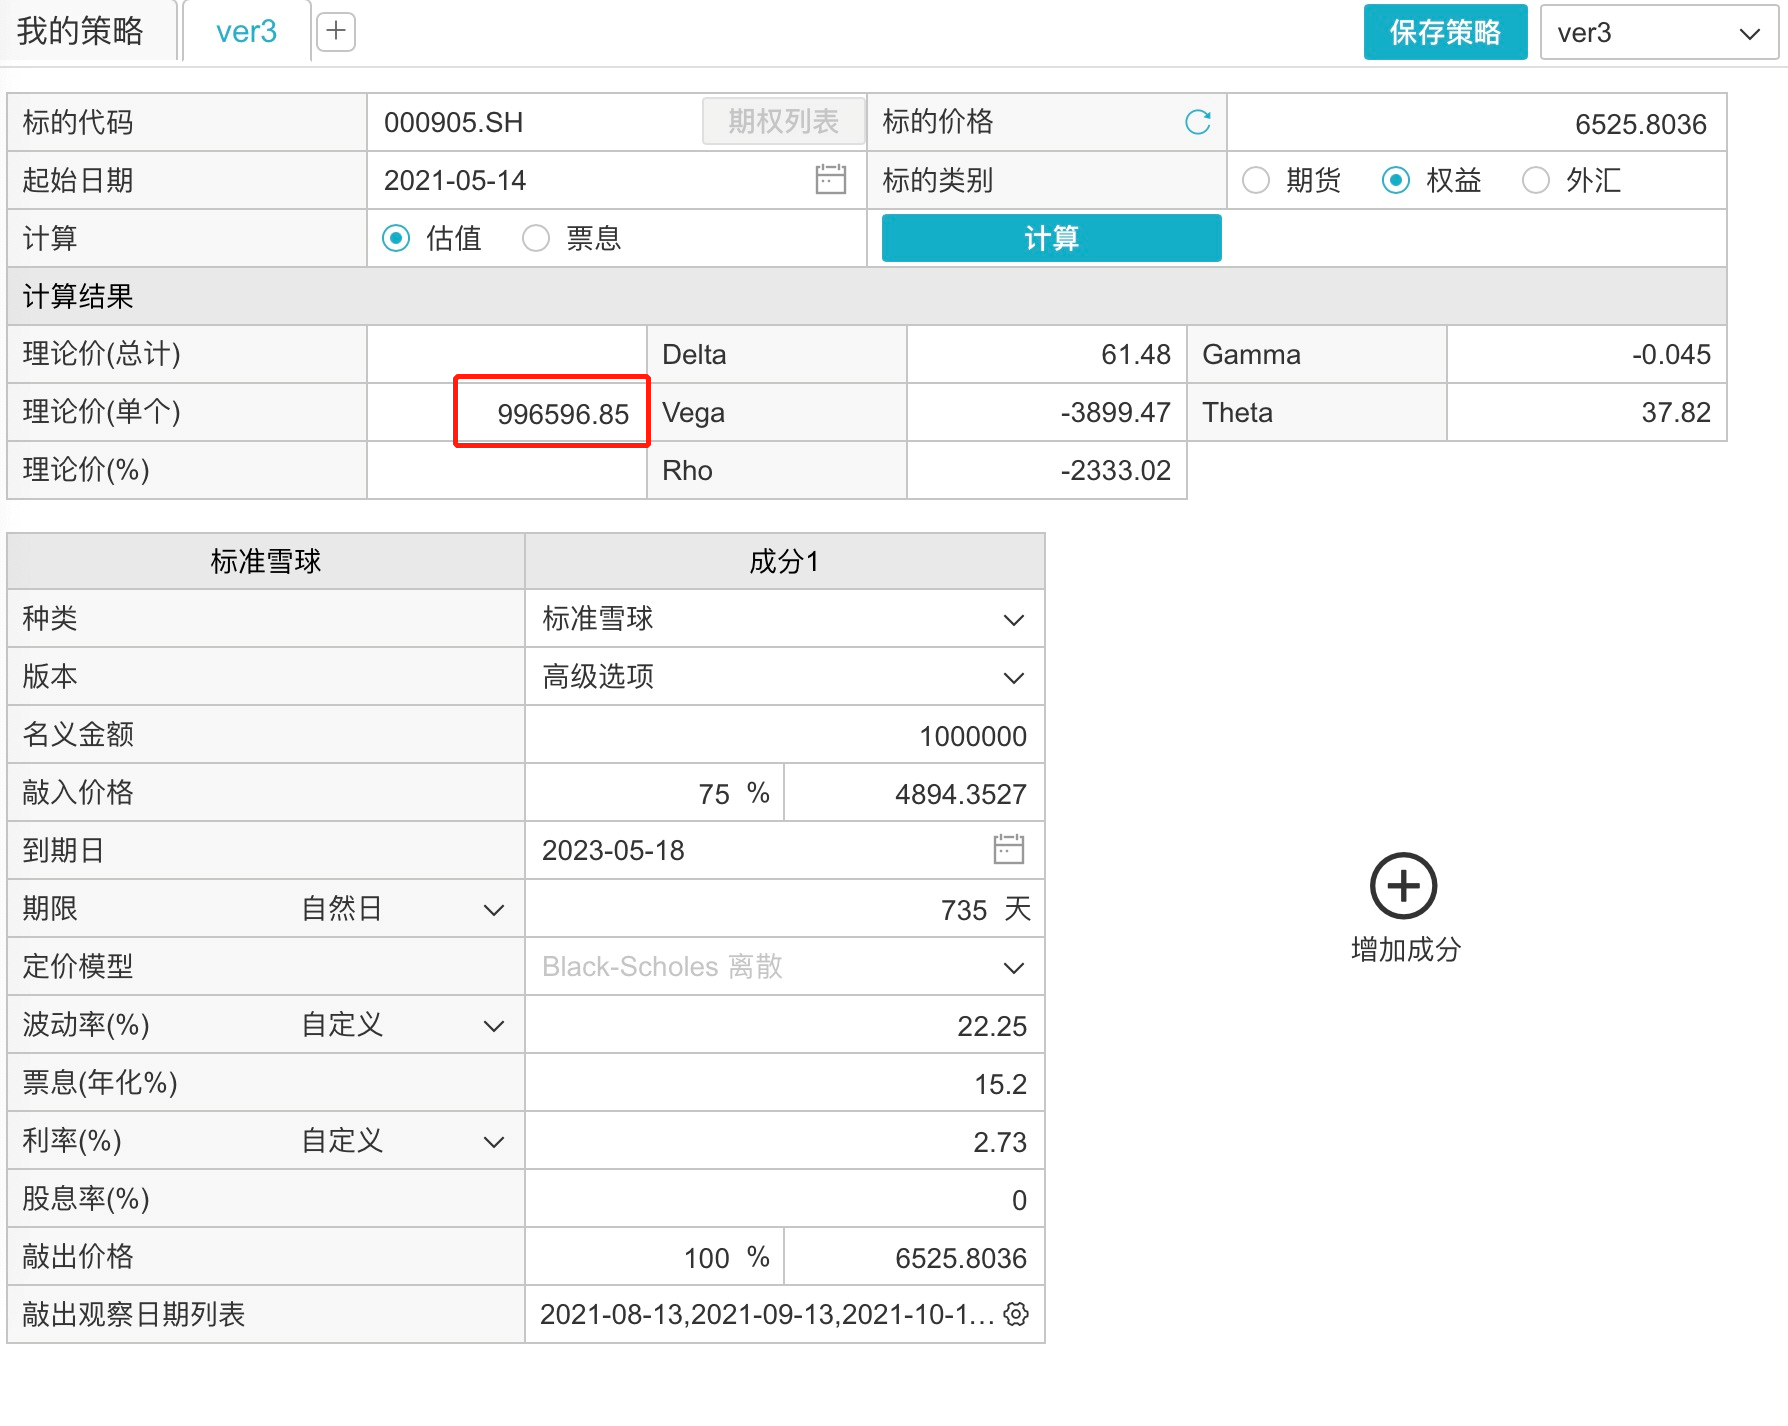

## Product 2

In [7]:
np.random.seed(0)
texp = 2
coupon_rate = 0.157
nominal_amount = 1000000
bound = [0.75, 1.0]
model = BSM_model(miu = 0.0273, sigma = 0.2225)# sigma is the ATM IV 
model_type = 'BSM'
n_path = 30000
n_time = texp * 365

snowball = SnowBallOption(texp, nominal_amount, coupon_rate, bound, model, model_type, n_path)
print('Snow Ball price is %.2f' %(snowball.price(spot_price=7607)))

Snow Ball price is 999844.82


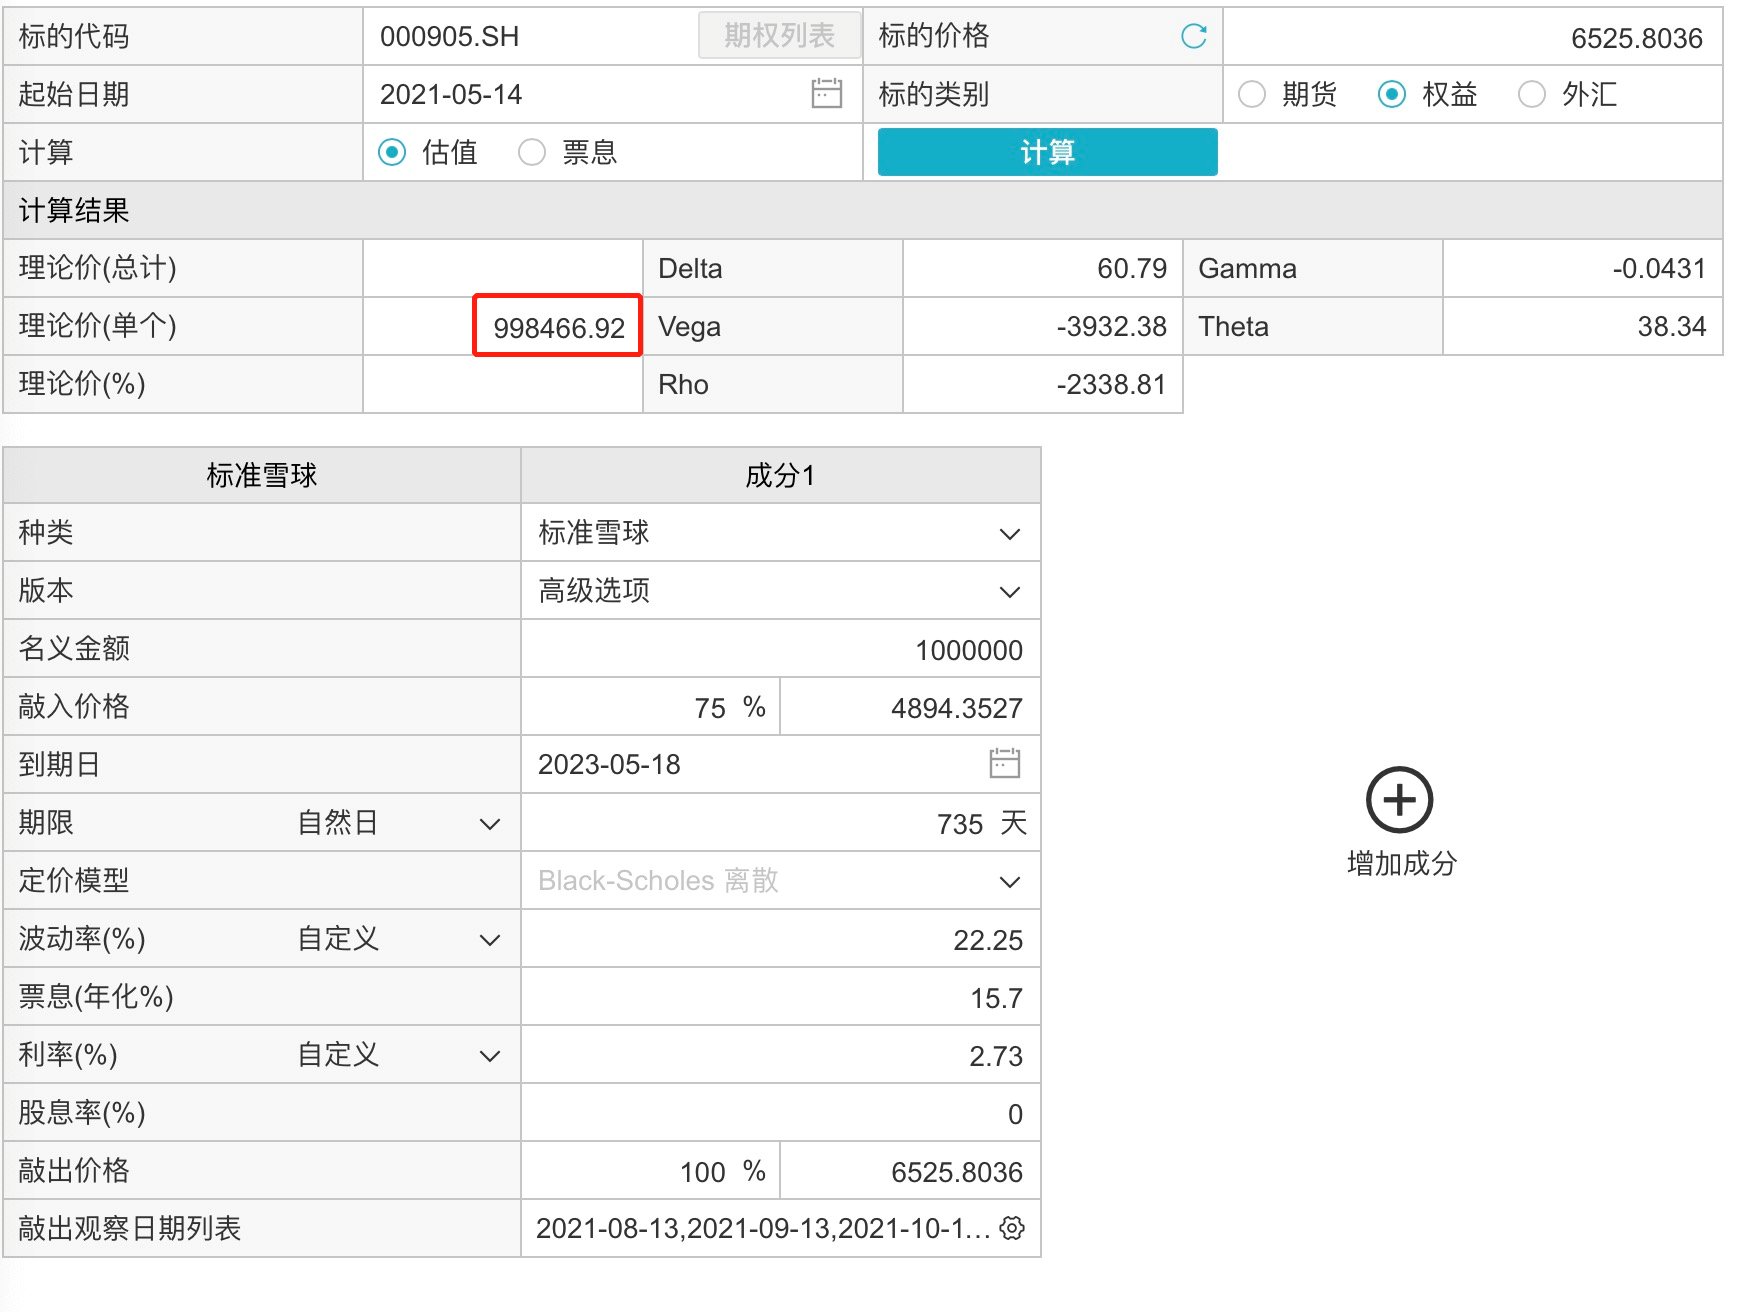

## Product3

In [8]:
np.random.seed(0)
texp = 2
coupon_rate = 0.157
nominal_amount = 1000000
bound = [0.75, 1.03]
model = BSM_model(miu = 0.0273, sigma = 0.2225)# sigma is the ATM IV 
model_type = 'BSM'
n_path = 30000
n_time = texp * 365

snowball = SnowBallOption(texp, nominal_amount, coupon_rate, bound, model, model_type, n_path) 
print('Snow Ball price is %.2f' %(snowball.price(spot_price=7835)))

Snow Ball price is 995558.62


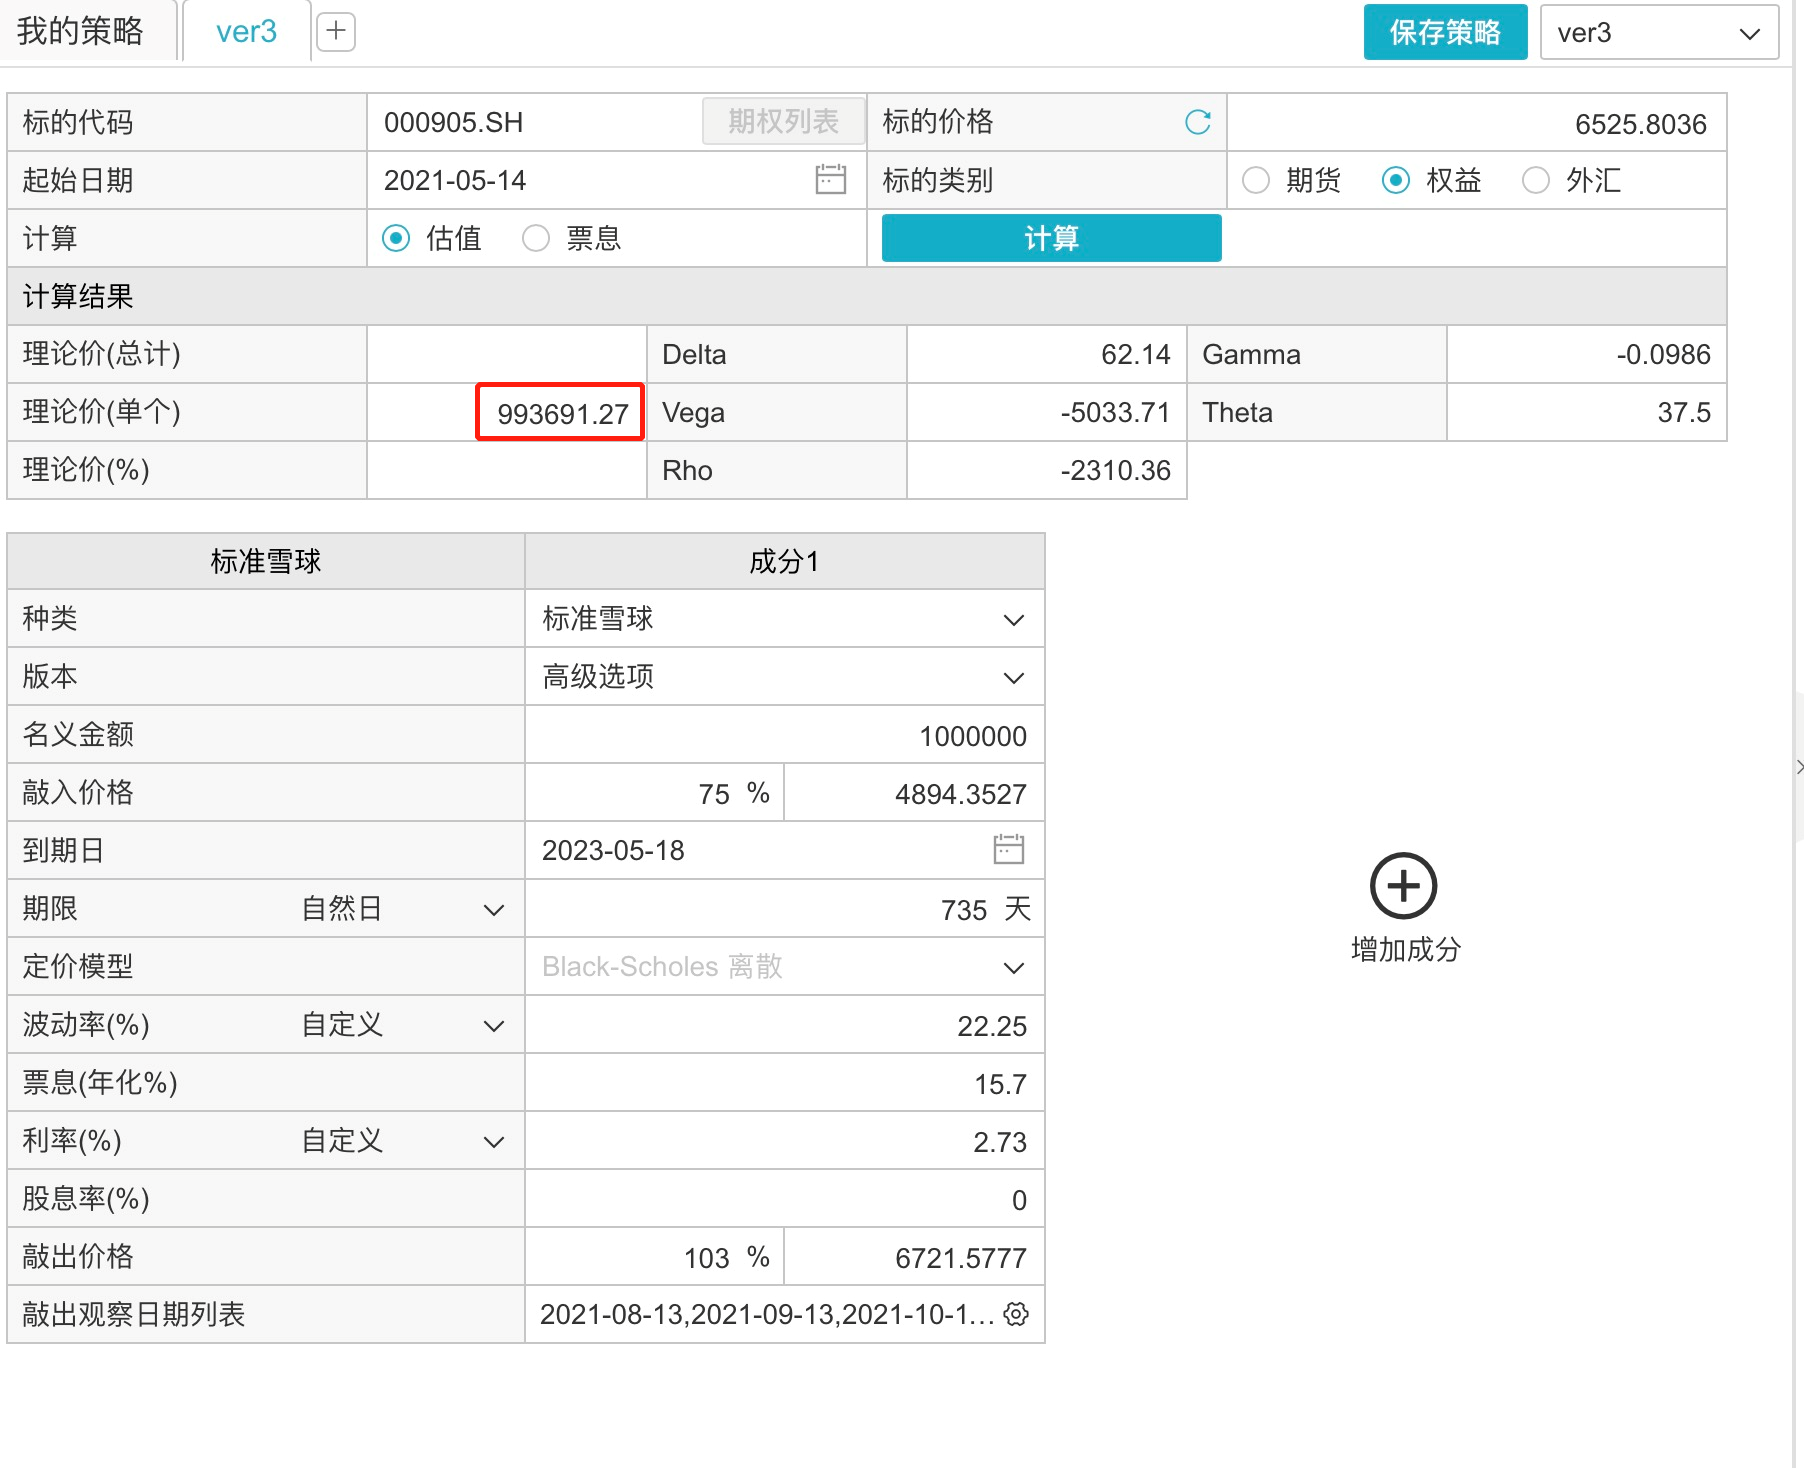

## Analysis the volatility influence on Snow Ball Option Price

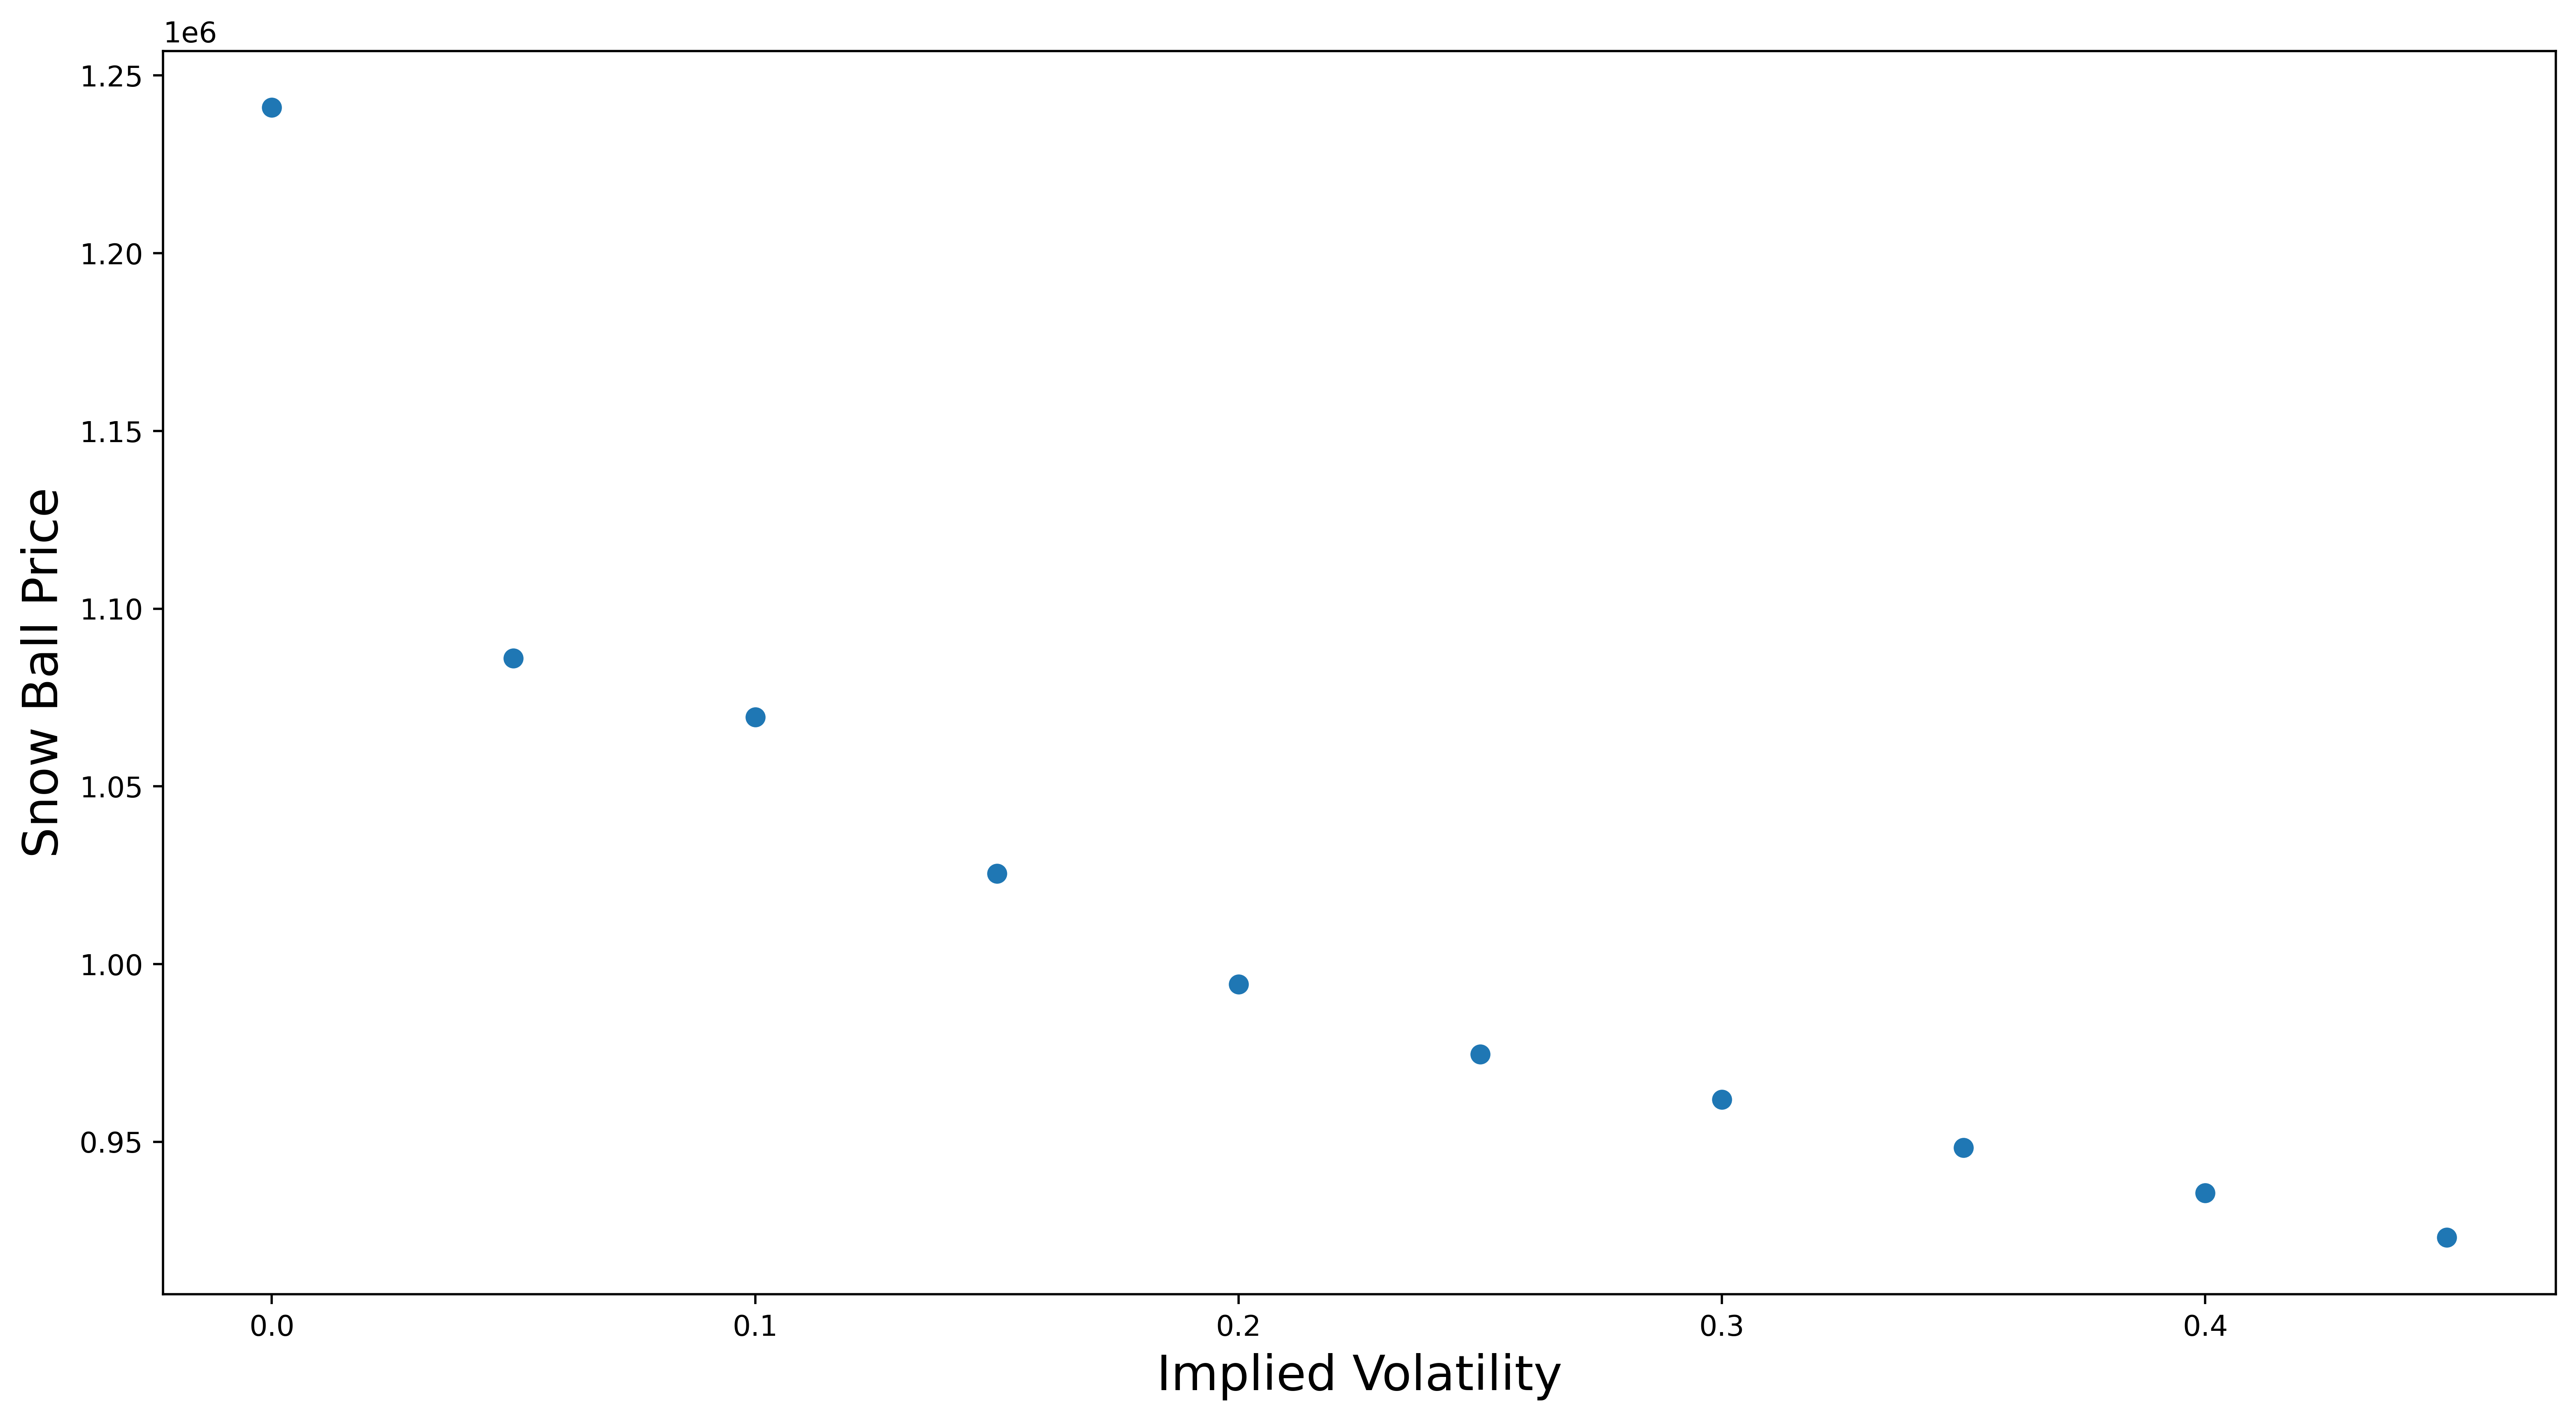

In [ ]:
def analysis_sigma(snowball):
    sigma_list = np.arange(0.0,0.5,0.05)
    price_list = []
    for sigma in sigma_list:
        BSM_model.sigma = sigma
        price_list.append(snowball.price(spot_price=1000))
    plt.figure(figsize=(15,8),dpi=500)
    plt.scatter(x=sigma_list, y=price_list,)
    plt.xlabel('Implied Volatility',fontsize=17)
    plt.ylabel('Snow Ball Price',fontsize=17)
    plt.savefig('./IV_analysis.png')
    plt.show()
BSM_model.miu = 0.00
analysis_sigma(snowball)

## Analysis the Underlying Assets return influence on Snow Ball Option Price

In [ ]:
def analysis_miu(snowball):
    df = pd.DataFrame(columns=['log return','knock out rate','knock in not out rate','both None rate','win rate','price'])
    miu_list = np.arange(0,0.45,0.05)
    for i,miu in enumerate(miu_list):
        BSM_model.miu = miu
        mc_res = snowball.MC_res(spot_price=1000)
        df.loc[i,'log return'] = miu
        df.loc[i,'knock out rate'] = (mc_res['knock_out'] == True).sum() / len(mc_res)
        df.loc[i,'knock in not out rate'] = ((mc_res['knock_out'] == False) & (mc_res['knock_in'] == True)).sum() / len(mc_res)
        df.loc[i, 'both None rate'] = ((mc_res['knock_out'] == False) & (mc_res['knock_in'] == False)).sum() / len(mc_res)
        df.loc[i,'win rate'] = df.loc[i,'knock out rate'] + df.loc[i, 'both None rate']
        df.loc[i,'price'] = mc_res['discounted payoff'].mean()
#     df = df.astype(float)
#     df = df.round(4)
    return df
BSM_model.sigma = 0.3347
df = analysis_miu(snowball)
df

,log return,knock out rate,knock in not out rate,both None rate,win rate,price
0,0.0,0.792967,0.206867,0.000167,0.793133,951251.763656
1,0.05,0.832767,0.167033,0.0002,0.832967,975095.452775
2,0.1,0.870133,0.129767,0.0001,0.870233,995860.073838
3,0.15,0.899967,0.099767,0.000267,0.900233,1010012.712655
4,0.2,0.925967,0.073933,0.0001,0.926067,1021262.289496
5,0.25,0.947533,0.052433,0.000033,0.947567,1029783.563186
6,0.3,0.9637,0.036167,0.000133,0.963833,1035786.836946
7,0.35,0.9753,0.024667,0.000033,0.975333,1038368.934272
8,0.4,0.9837,0.0162,0.0001,0.9838,1040150.357326


# Snow Ball Pricing on Heston Model

## Volatility Smile

### Realistic Volatilty Smile

In [45]:
vol_smile = pd.read_excel('../vol smile.xlsx')
vol_smile.Date = vol_smile.Date.astype(str)
vol_smile 

,Date,1Y w_iv_1y1000,1Y w_iv_1y975,1Y w_iv_1y950,1Y w_iv_1y900,1Y w_iv_1y800,1Y w_iv_1y600,1Y w_iv_1y1025,1Y w_iv_1y1050,1Y w_iv_1y1100,1Y w_iv_1y1200,1Y w_iv_1y1300
0,20220919,22.25,22.36,22.51,22.76,24.15,23.88,22.40,22.14,22.20,21.96,22.80
1,20220920,22.15,22.45,22.75,23.16,24.71,27.80,22.02,21.95,21.81,21.96,22.20
2,20220921,22.42,22.58,22.73,23.06,23.76,25.41,22.27,22.13,21.85,21.33,20.87
3,20220922,22.18,22.53,22.93,23.49,24.89,27.70,21.99,21.83,21.61,21.80,22.55
4,20220923,22.43,22.77,23.16,23.87,25.48,28.70,22.26,22.16,21.85,21.85,22.04
5,20220926,22.92,23.33,23.70,24.37,25.61,28.09,22.64,22.48,22.23,22.25,22.68
6,20220927,22.37,22.67,22.99,23.69,25.61,29.45,22.12,21.90,21.64,21.67,21.88
7,20220928,23.44,23.73,24.18,24.89,27.71,33.63,23.23,22.99,22.77,22.72,23.09
8,20220929,23.39,23.61,23.87,24.69,27.01,31.73,23.17,22.92,22.69,22.78,23.04
9,20220930,22.78,22.96,23.30,24.13,26.04,29.89,22.56,22.37,22.15,22.19,22.60


In [46]:
# strike price
strike = [600, 800, 900, 950, 975, 1000, 1025, 1050, 1100, 1200, 1300]
# Spot price
Spot = 1000
# Date 
date = '20220919'

In [47]:
real_vol = vol_smile.loc[vol_smile.Date==date,[f'1Y w_iv_1y{i}' for i in strike]]
real_vol = real_vol / 100
real_vol

,1Y w_iv_1y600,1Y w_iv_1y800,1Y w_iv_1y900,1Y w_iv_1y950,1Y w_iv_1y975,1Y w_iv_1y1000,1Y w_iv_1y1025,1Y w_iv_1y1050,1Y w_iv_1y1100,1Y w_iv_1y1200,1Y w_iv_1y1300
0,0.2388,0.2415,0.2276,0.2251,0.2236,0.2225,0.224,0.2214,0.222,0.2196,0.228


### Heston Model Simulate Volatility Smile

In [ ]:
# Grid Search for parameters
def param_search(real_vol):
    df = pd.DataFrame(index=strike,columns=['Realistic IV','Heston IV'])
    df.loc[:,'Realistic IV'] = real_vol.values.T
    sigma_list = np.arange(0,0.1,0.02)
    vov_list = np.arange(0,0.5,0.02)
    rho_list = np.arange(0,1.0,0.05)
    mr_list = np.arange(0,0.5,0.05)
    theta_list = np.arange(0,0.1,0.01)
#     theta = 0.1
    mse = 10.0
    for sigma in sigma_list:
        for vov in vov_list:
            for rho in rho_list:
                for mr in mr_list:
                    for theta in theta_list:
                        m0 = pf.HestonFft(sigma, vov, rho, mr, theta, intr=0.0273)
                        df.loc[:,'Heston IV'] = m0.vol_smile(strike, spot, texp)
                        mse_tp1 = sum((df.loc[:,'Realistic IV']-df.loc[:,'Heston IV'])**2)
                        if mse_tp1<mse:
                            mse = mse_tp1
                            print(f'->>>>sigma: {sigma}, vov: {vov}, rho: {rho}, theta: {theta}, mr: {mr}, mse: {mse}')
                        else:
                            continue
    
#     return sigma, vov, rho, theta, mr

param_search(real_vol)

F:\Anaconda\lib\site-packages\pyfeng\sv_fft.py:178: RuntimeWarning: invalid value encountered in true_divide
  gg = (beta - dd)/(beta + dd)
F:\Anaconda\lib\site-packages\pyfeng\sv_fft.py:182: RuntimeWarning: invalid value encountered in true_divide
  mgf = self.mr*self.theta*((beta - dd)*texp - 2*np.log(tmp1/(1 - gg))) + var_0*(beta - dd)*(1 - exp)/tmp1
F:\Anaconda\lib\site-packages\pyfeng\sv_fft.py:182: RuntimeWarning: invalid value encountered in log
  mgf = self.mr*self.theta*((beta - dd)*texp - 2*np.log(tmp1/(1 - gg))) + var_0*(beta - dd)*(1 - exp)/tmp1
F:\Anaconda\lib\site-packages\pyfeng\sv_fft.py:183: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(mgf/vov2)
F:\Anaconda\lib\site-packages\pyfeng\bsm.py:223: RuntimeWarning: divide by zero encountered in true_divide
  _sigma -= p_err/vega


->>>>sigma: 0.0, vov: 0.02, rho: 0.0, theta: 0.02, mr: 0.05, mse: 0.4257215146968634
->>>>sigma: 0.0, vov: 0.02, rho: 0.0, theta: 0.03, mr: 0.05, mse: 0.40268511968386933
->>>>sigma: 0.0, vov: 0.02, rho: 0.0, theta: 0.04, mr: 0.05, mse: 0.3829228289129299
->>>>sigma: 0.0, vov: 0.02, rho: 0.0, theta: 0.05, mr: 0.05, mse: 0.36553716996255126
->>>>sigma: 0.0, vov: 0.02, rho: 0.0, theta: 0.06, mr: 0.05, mse: 0.349975097461517
->>>>sigma: 0.0, vov: 0.02, rho: 0.0, theta: 0.07, mr: 0.05, mse: 0.33586770353457596
->>>>sigma: 0.0, vov: 0.02, rho: 0.0, theta: 0.08, mr: 0.05, mse: 0.3229538107207778
->>>>sigma: 0.0, vov: 0.02, rho: 0.0, theta: 0.09, mr: 0.05, mse: 0.28154540825541946
->>>>sigma: 0.0, vov: 0.02, rho: 0.0, theta: 0.05, mr: 0.1, mse: 0.2735129896842022
->>>>sigma: 0.0, vov: 0.02, rho: 0.0, theta: 0.06, mr: 0.1, mse: 0.2519677146166747
->>>>sigma: 0.0, vov: 0.02, rho: 0.0, theta: 0.07, mr: 0.1, mse: 0.232782910196706
->>>>sigma: 0.0, vov: 0.02, rho: 0.0, theta: 0.08, mr: 0.1, mse: 0

F:\Anaconda\lib\site-packages\pyfeng\bsm.py:223: RuntimeWarning: overflow encountered in true_divide
  _sigma -= p_err/vega


->>>>sigma: 0.02, vov: 0.02, rho: 0.0, theta: 0.09, mr: 0.2, mse: 0.02481978555656838
->>>>sigma: 0.02, vov: 0.02, rho: 0.0, theta: 0.08, mr: 0.25, mse: 0.02346934444573286
->>>>sigma: 0.02, vov: 0.02, rho: 0.0, theta: 0.09, mr: 0.25, mse: 0.018019334540488183
->>>>sigma: 0.02, vov: 0.02, rho: 0.0, theta: 0.09, mr: 0.30000000000000004, mse: 0.012824512417668238
->>>>sigma: 0.02, vov: 0.02, rho: 0.0, theta: 0.09, mr: 0.35000000000000003, mse: 0.008891205519255277
->>>>sigma: 0.02, vov: 0.02, rho: 0.0, theta: 0.09, mr: 0.4, mse: 0.005957358067689223
->>>>sigma: 0.02, vov: 0.02, rho: 0.0, theta: 0.09, mr: 0.45, mse: 0.003820327774337679
->>>>sigma: 0.04, vov: 0.02, rho: 0.0, theta: 0.09, mr: 0.1, mse: 0.003106253393670531
->>>>sigma: 0.04, vov: 0.02, rho: 0.0, theta: 0.08, mr: 0.15000000000000002, mse: 0.0025345825672982735
->>>>sigma: 0.04, vov: 0.02, rho: 0.0, theta: 0.09, mr: 0.15000000000000002, mse: 0.001696202700389209
->>>>sigma: 0.04, vov: 0.02, rho: 0.0, theta: 0.08, mr: 0.2, mse

In [60]:
m0 = pf.HestonFft(sigma = 0.06, vov = 0.17, rho=-0.2,mr=0.15,theta=0.01,intr=0.0273)
texp = 2
spot = 1000
vol = m0.vol_smile(strike, spot, texp)

In [61]:
df = pd.DataFrame(index=strike,columns=['Realistic IV','Heston IV'])
df.loc[:,'Realistic IV'] = real_vol.values.T
df.loc[:,'Heston IV'] = vol
df

,Realistic IV,Heston IV
600,0.2388,0.255735
800,0.2415,0.235557
900,0.2276,0.227970
950,0.2251,0.224868
975,0.2236,0.223502
1000,0.2225,0.222263
1025,0.2240,0.221151
1050,0.2214,0.220169
1100,0.2220,0.218587
1200,0.2196,0.216852


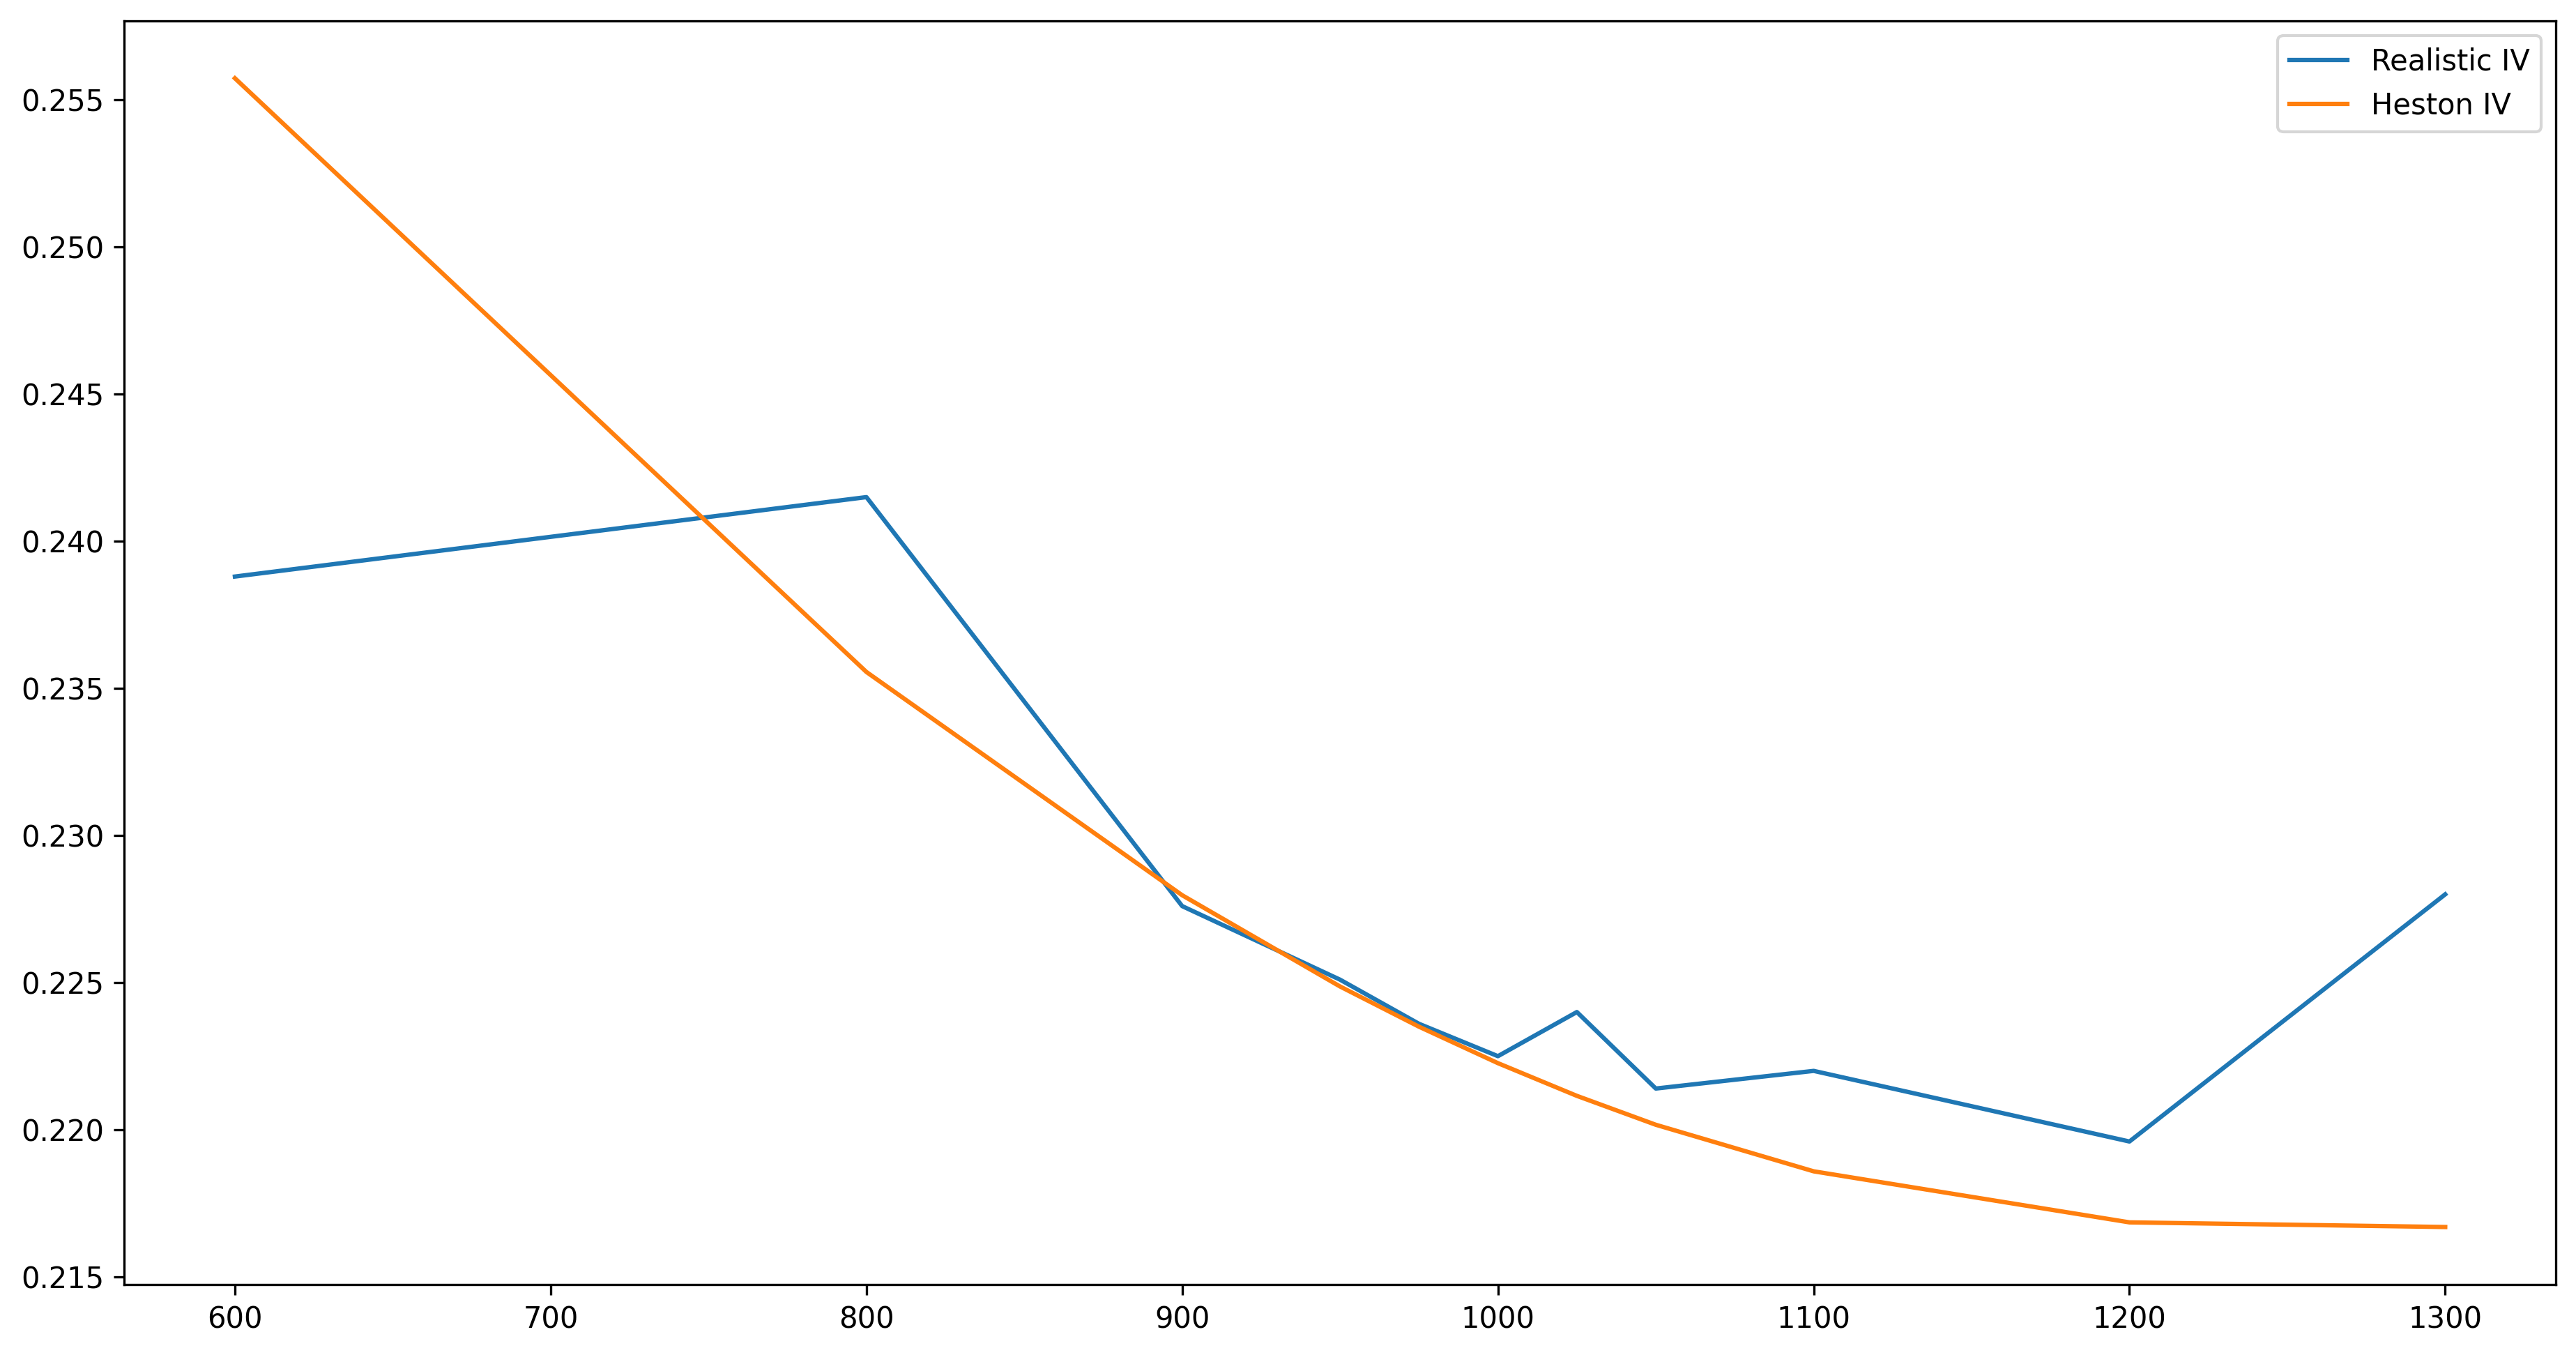

In [62]:
figure, ax = plt.subplots(figsize=(15,8),dpi=300)
ax.plot(df)
ax.legend(df.columns,loc='upper right')

<b><font face="Times New Roman" size=4.5>Pricing</font><br>

In [ ]:
class Heston_model:
    sigma = 0.06
    vov = 0.017
    rho = 0.0
    mr = 0.15
    theta = 0.01
    intr = 0.02

    def __init__(self,sigma,vov,rho,mr,theta,intr):
        self.sigma = sigma
        self.vov = vov
        self.rho = rho
        self.mr = mr
        self.theta = theta
        self.intr = intr
    def stock_price(self, m1, S_t: np.array, sigma_t, dt):
        """
        @param m1: pf.HestonMcAndersen2008()
        @param S_t: stock price in t
        @param sigma_t: sigma in t
        @param dt: discrete time interval
        @return:
        """
        sigma_tp1, avgvar, *_ = m1.cond_states_step(dt, sigma_t)
        log_rt = m1.draw_log_return(dt, sigma_t, sigma_tp1, avgvar)
        S_tp1 = S_t * np.exp(log_rt)

        return S_tp1, sigma_tp1

## Product 1

In [10]:
np.random.seed(0)
texp = 2
coupon_rate = 0.152
nominal_amount = 1000000
bound = [0.75, 1.0]
model = Heston_model(sigma = 0.06, vov = 0.17, rho=-0.2,mr=0.15,theta=0.01,intr=0.0273)# sigma is the ATM IV 
model_type = 'Heston'
n_path = 30000
n_time = texp * 365
strike = [600, 800, 900, 950, 975, 1000, 1025, 1050, 1100, 1200, 1300]
snowball = SnowBallOption(texp, nominal_amount, coupon_rate, bound, model, model_type, n_path)

print(f'Snow Ball price is {snowball.price(spot_price=1000)}')

Snow Ball price is 996589.6841579175


<font face="Times New Roman" size=4.5>The same product price in BSM model is 997968.58, which is a little bit higher than Heston model</font>

## Product 2

In [11]:
np.random.seed(0)
texp = 2
coupon_rate = 0.157
nominal_amount = 1000000
bound = [0.75, 1.0]
model = Heston_model(sigma = 0.06, vov = 0.17, rho=-0.2,mr=0.15,theta=0.01,intr=0.0273)# sigma is the ATM IV 
model_type = 'Heston'
n_path = 30000
n_time = texp * 365
strike = [600, 800, 900, 950, 975, 1000, 1025, 1050, 1100, 1200, 1300]
snowball = SnowBallOption(texp, nominal_amount, coupon_rate, bound, model, model_type, n_path)
print(f'Snow Ball price is {snowball.price(spot_price=10000)}')

Snow Ball price is 998532.4856738008


<font face="Times New Roman" size=4.5>The same product price in BSM model is 999844.82, which is a little bit higher than Heston model</font>

## Product 3

In [14]:
np.random.seed(0)
texp = 2
coupon_rate = 0.157
nominal_amount = 1000000
bound = [0.75, 1.03]
model = Heston_model(sigma = 0.06, vov = 0.17, rho=-0.2,mr=0.15,theta=0.01,intr=0.0273)# sigma is the ATM IV 
model_type = 'Heston'
n_path = 30000
n_time = texp * 365
strike = [600, 800, 900, 950, 975, 1000, 1025, 1050, 1100, 1200, 1300]
snowball = SnowBallOption(texp, nominal_amount, coupon_rate, bound, model, model_type, n_path)
print('Snow Ball price is %.2f' %(snowball.price(spot_price=10000)))

Snow Ball price is 995869.45


<font face="Times New Roman" size=4.5>The same product price in BSM model is Snow Ball price is 995558.62, which is a little bit higher than Heston model</font>

## The influence of rho in Snow Ball Price 

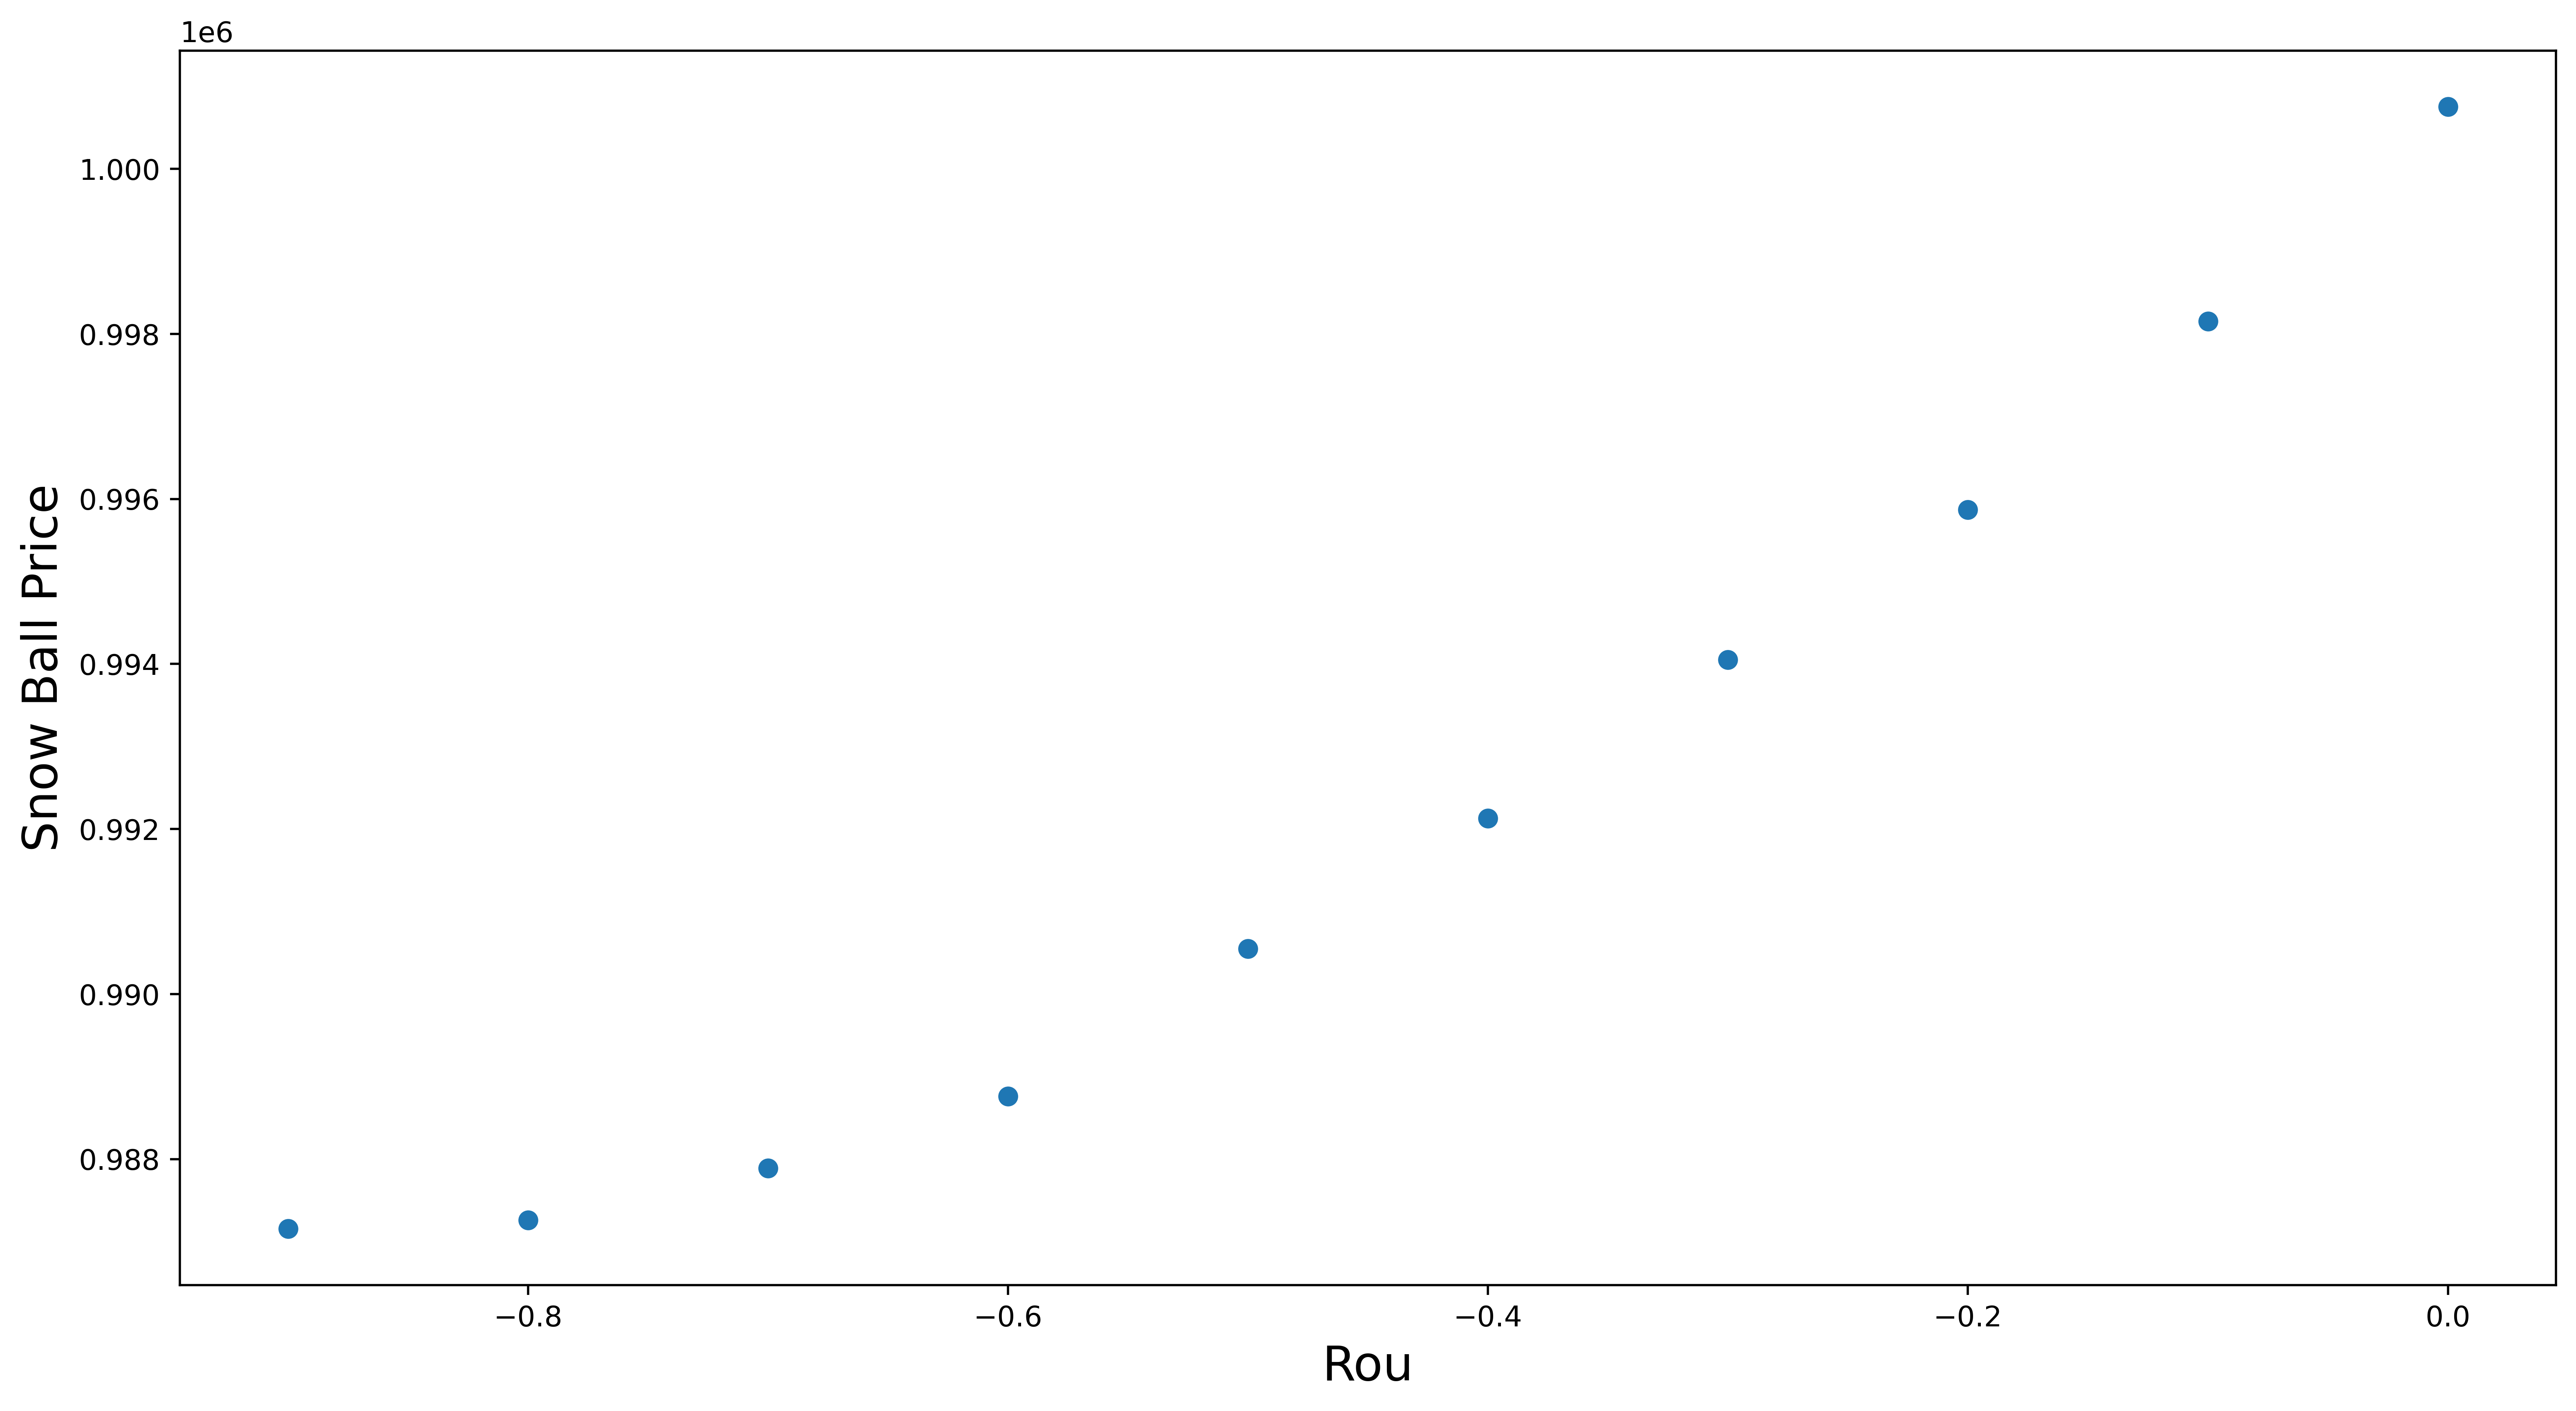

In [16]:
def analysis_rho(snowball):
    rho_list = np.arange(0.0,-1,-0.1)
    price_list = []
    for rho in rho_list:
        snowball.model = Heston_model(sigma = 0.06, vov = 0.17, rho=rho,mr=0.15,theta=0.01,intr=0.0273)
        price_list.append(snowball.price(spot_price=1000))
    plt.figure(figsize=(15,8),dpi=500)
    plt.scatter(x=rho_list, y=price_list)
    plt.xlabel('Rou',fontsize=17)
    plt.ylabel('Snow Ball Price',fontsize=17)
#     plt.savefig('./IV_analysis.png')
    plt.show()
analysis_rho(snowball)